# Diabetes Classification - Models
[Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://twitter.com/joserzapata
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/       


## Introduction


Analyze factors related to readmission as well as other outcomes pertaining to patients in order to classify a patient-hospital outcome

3 different outputs:

1. No readmission

2. A readmission in less than `30` days (this situation is not good, because maybe your treatment was not appropriate);

3. A readmission in more than 30 days (this one is not so good as well the last one, however, the reason could be the state of the patient.


## Main Objective

> **How effective was the treatment received in hospital?**

## Principal References

### Paper

Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

https://www.hindawi.com/journals/bmri/2014/781670/

### Dataset

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#

### Data description

https://www.hindawi.com/journals/bmri/2014/781670/tab1/

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import model_selection
import plotly.express as px

# Load Dataset

In [2]:
data = pd.read_csv("../data/processed/data_imbalanced.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53214 entries, 0 to 53213
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      53214 non-null  object
 1   gender                    53214 non-null  int64 
 2   age                       53214 non-null  object
 3   admission_type_id         53214 non-null  int64 
 4   discharge_disposition_id  53214 non-null  int64 
 5   admission_source_id       53214 non-null  int64 
 6   time_in_hospital          53214 non-null  int64 
 7   medical_specialty         53214 non-null  object
 8   num_lab_procedures        53214 non-null  int64 
 9   num_procedures            53214 non-null  int64 
 10  num_medications           53214 non-null  int64 
 11  number_outpatient         53214 non-null  int64 
 12  number_emergency          53214 non-null  int64 
 13  number_inpatient          53214 non-null  int64 
 14  diag_1                

## Encode categorical colums

In [4]:
cat_cols = list(data.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53214 entries, 0 to 53213
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   gender                                             53214 non-null  int64
 1   admission_type_id                                  53214 non-null  int64
 2   discharge_disposition_id                           53214 non-null  int64
 3   admission_source_id                                53214 non-null  int64
 4   time_in_hospital                                   53214 non-null  int64
 5   num_lab_procedures                                 53214 non-null  int64
 6   num_procedures                                     53214 non-null  int64
 7   num_medications                                    53214 non-null  int64
 8   number_outpatient                                  53214 non-null  int64
 9   number_emergency            

## Input and output data

Get the names of input features and output feature

In [6]:
X = data.drop("readmitted", axis=1)
y= data["readmitted"]

In [7]:
X.shape

(53214, 84)

In [8]:
y.shape

(53214,)

## Split dataset 70/30

70% to train the model
30% to test the model

Split data stratify = y because the dataset is imbalanced

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state =123, stratify=y)

In [10]:
perc_test = y_test.value_counts()[1]*100/len(y_test)
perc_train = y_train.value_counts()[1]*100/len(y_train)

print(f" Percentage of positives in test set={perc_test} , train set={perc_train}")

Percentage of positives in test set=4.046351393673661 , train set=4.0457461945287125


# MODELS

## Evaluation Metric

The selected evaluation metric is the 
> **Recall**

Becasuse the Benefit of a True Negative is much higher than a True Positive.

A False Negative might delay more tests or treatment, 
however a False Positive may just lead to more tests or treatments – not as costly as putting a life at stake.


In [11]:
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Interpretability is important so first intents will be with classic Machine Learning Models, No ensembles, No Neural Networks

In [12]:
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Model Selection

In [13]:
seed =2
models = []
#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear')))

# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))
# Naïve Bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('SVM', SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)))
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	#X train , y train
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
	print(msg)

(LR, 0.010619194876535438, 0.0072737053369331325
(CART, 0.10495330067974402, 0.021033890589167152
(NB, 0.9378174963868734, 0.008952183865945028
(SVM, 0.7663281896928434, 0.03593820728648552


## Results

In [14]:
result_df = pd.DataFrame(results, index=names).T
px.box(result_df,title = 'Algorithm Comparison')

# Hyper Parameter optimization


In [15]:
#from sklearn.model_selection import GridSearchCV

In [16]:


#parameters = {'max_depth': [2, 4, 5, 7, 9, 10]}


#grid_search = GridSearchCV(GaussianNB(), parameters, cv=10, return_train_score=True)
#grid_search.fit(x_train, y_train)

#grid_search.best_params_

# Final evaluation Test set

In [17]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## Naïve Bayes

In [18]:
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.98      0.14      0.24     15319
           1       0.04      0.93      0.08       646

    accuracy                           0.17     15965
   macro avg       0.51      0.53      0.16     15965
weighted avg       0.94      0.17      0.23     15965



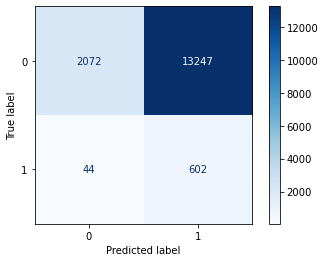

In [20]:
plot_confusion_matrix(NB, X_test, y_test,cmap=plt.cm.Blues); 

# Model Interpretability

In [21]:
len(NB.theta_[0])

84

In [22]:
NB.epsilon_

1.5251216790436232e-06

In [23]:
NB.sigma_

array([[2.49344725e-01, 2.31050329e+00, 2.40967184e+01, 1.76634694e+01,
        8.34871273e+00, 3.97603434e+02, 3.12843949e+00, 7.02624079e+01,
        1.02591391e+00, 2.04458119e-01, 2.84779294e-01, 4.16519209e+00,
        4.23146346e+02, 1.52578908e+03, 1.70812397e-01, 1.09308152e-02,
        7.05750835e-03, 1.00772903e-03, 5.02594032e-02, 2.95026277e-05,
        1.09339801e-01, 9.75386096e-02, 2.53266316e-04, 6.98839043e-02,
        6.08926144e-02, 2.31833049e-03, 1.97334787e-04, 2.95026277e-05,
        4.48977350e-04, 2.50001271e-01, 6.75402666e-03, 8.54529432e-05,
        5.74785682e-05, 2.95026277e-05, 2.46718288e-01, 1.87606400e-01,
        2.19165765e-01, 7.74653497e-03, 1.75114114e-01, 2.24707635e-02,
        1.78297249e-02, 8.26954079e-03, 1.71281777e-02, 3.88728197e-02,
        9.18939432e-02, 1.49711343e-01, 1.75160046e-01, 1.83818629e-01,
        1.28121577e-01, 2.43353252e-02, 5.30256913e-02, 6.48141213e-02,
        4.98455762e-03, 1.32074176e-01, 8.73701430e-03, 9.972260

# Save Model

In [24]:
from joblib import dump # libreria de serializacion

# garbar el modelo en un archivo
dump(NB, '../models/NB_imbalance_recall.joblib')

['../models/NB_imbalance_recall.joblib']

# Conclusiones

# Ayudas Y Referencias

- Correction to: Hospital Readmission of Patients with Diabetes - https://link.springer.com/article/10.1007/s11892-018-0989-1

- Center for disease control and prevention, Diabetes atlas- https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html

- https://medium.com/@joserzapata/paso-a-paso-en-un-proyecto-machine-learning-bcdd0939d387
- [a-complete-machine-learning-walk-through-in-python-part-one](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)

- https://www.kaggle.com/vignesh1609/readmission-classification-model

- https://www.kaggle.com/kavyarall/predicting-effective-treatments/

[Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://twitter.com/joserzapata
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/   